1.У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам. В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка:  +𝑐∗∑𝑗𝑤2𝑗  а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.

In [1]:
class linear_regression:
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0+self.c*np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]+2*self.c*self.w, np.sum(2*delta)/y_real.shape[0]

2.На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока. Пояснение:Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием).

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)


class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y[:, np.newaxis])
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y[:, np.newaxis])

In [3]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
dots = np.linspace(-10, 10, 100)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [4]:
class New_LGR_(polynomial_regression):
    @staticmethod
    def mserror(self, X, y_real):
        y = X.dot(self.w.T)+self.w0+self.c*np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    @staticmethod
    def mserror_grad(self, X, y_real):
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]+2*self.c*self.w, np.sum(2*delta)/y_real.shape[0]

In [5]:
model = New_LGR_(max_power = 5, eta = 0.01)
model.fit(x_data, f_data)
model.predict(x_data)

array([ 1.59477181e+02, -9.41628766e-03, -2.10462997e-01,  2.37590805e+03,
        2.20060867e+00,  1.60158787e+02, -6.45533928e+01,  4.69483837e+02,
        1.76357128e+03, -3.44854628e+03])

In [6]:
np.sum(model.w**2)

0.017519277260435083

In [7]:
model_2 = polynomial_regression(5, eta = 0.01)
model_2.fit(x_data, f_data)
model_2.predict(x_data)

array([ 1.59477181e+02, -9.41628766e-03, -2.10462997e-01,  2.37590805e+03,
        2.20060867e+00,  1.60158787e+02, -6.45533928e+01,  4.69483837e+02,
        1.76357128e+03, -3.44854628e+03])

In [8]:
np.sum(model_2.w**2)

0.017519277260435083

In [9]:
model.test(x_data,f_data)

183029.761584641

In [10]:
model_2.test(x_data,f_data)

183029.761584641

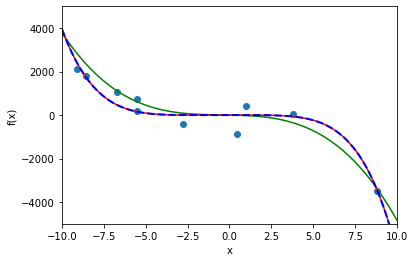

In [11]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='green')
plt.scatter(x_data, f_data)

#C L2
plt.plot(dots, model.predict(dots), color='red')
#Без L2
plt.plot(dots, model_2.predict(dots), 'm--', linewidth=2, color = 'blue')
plt.show()

In [12]:
def r_2(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(r_2(model.predict(x_data), f_data))


0.9186380279205633


Модель описывает примерно 92% изменчивости